(sec:timeseries)=
# 시계열 데이터 

In [737]:
import numpy as np
import pandas as pd

In [738]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [739]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

In [740]:
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(10, 6))

## `datetime` 자료형

In [741]:
from datetime import datetime

In [742]:
now = datetime.now()
now

datetime.datetime(2025, 3, 13, 11, 43, 7, 827699)

In [743]:
print(now.year, now.month, now.day)

2025 3 13


In [744]:
delta = datetime(2025, 3, 13) - datetime(2025, 1, 1, 0, 0)
delta

datetime.timedelta(days=71)

In [745]:
delta.days

71

In [746]:
delta.seconds

0

In [747]:
from datetime import timedelta

In [748]:
start = datetime(2011, 1, 7)

In [749]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [750]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 문자열과 `Datetime`

In [751]:
stamp = datetime(2011, 1, 3)

In [752]:
str(stamp)

'2011-01-03 00:00:00'

In [753]:
stamp.strftime("%Y-%m-%d %H:%M:%S")

'2011-01-03 00:00:00'

In [754]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [755]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

`pd.to_datetime()` 함수

In [756]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [757]:
idx = pd.to_datetime(datestrs + [None]) #시계열의 nan값 = NaT
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [758]:
idx[2]

NaT

In [759]:
pd.isna(idx)

array([False, False,  True])

## 시계열 데이터 기초

In [760]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [761]:
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [762]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [763]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [764]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [765]:
ts.index.dtype

dtype('<M8[ns]')

In [766]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 인덱싱, 선택, 슬라이싱

In [767]:
stamp = ts.index[2]
ts[stamp]

np.float64(-0.5194387150567381)

In [768]:
ts["2011-01-10"]

np.float64(1.9657805725027142)

In [769]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [770]:
longer_ts["2001"]

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [771]:
longer_ts["2001-05"]

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [772]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [773]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [774]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [775]:
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [776]:
ts.truncate(after="2011-01-09")

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [777]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED") #매주 수요일요일

long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas", "New York", "Ohio"])

In [778]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [779]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### 중복 인덱스 라벨을 갖는 시계열 데이터

In [780]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])

dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [781]:
dup_ts.index.is_unique

False

In [782]:
dup_ts["2000-01-03"]  # not duplicated

np.int64(4)

In [783]:
dup_ts["2000-01-02"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [784]:
grouped = dup_ts.groupby(level=0)

In [785]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [786]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 날짜 구간 인덱스, 빈도, 시프팅

### 날짜 구간 인덱스 생성

In [787]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [788]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [789]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [790]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3742551278.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [791]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [792]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 빈도와 빈도 단위

In [793]:
from pandas.tseries.offsets import Hour, Minute

In [794]:
hour = Hour()
hour

<Hour>

In [795]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [796]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3449897904.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [797]:
Hour(2) + Minute(30)

<150 * Minutes>

In [798]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

In [799]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### 데이터 시프팅

In [800]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3562605038.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2000-01-01", periods=4, freq="M"))


2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: ME, dtype: float64

In [801]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: ME, dtype: float64

In [802]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [803]:
ts.shift(2, freq="M")

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\903147437.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq="M")


2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: ME, dtype: float64

In [804]:
ts.shift(3, freq="D")

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [805]:
ts.shift(1, freq="90T")

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\584021106.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64

**offset 활용 시프팅**

In [806]:
from pandas.tseries.offsets import Day, MonthEnd

In [807]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [808]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [809]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [810]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [811]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [812]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [813]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [814]:
ts.resample("M").mean()

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: ME, dtype: float64

## 시간대

In [815]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [816]:
tz = pytz.timezone("America/New_York")
tz = pytz.timezone('Asia/Seoul')
tz

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

### 시간대 지정

In [817]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [818]:
print(ts.index.tz)

None


In [819]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [820]:
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [821]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [822]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [823]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [824]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
dtype: float64

In [825]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

In [826]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### 시간대와 타임 스탬프

In [827]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [828]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [829]:
stamp_utc.value

1299902400000000000

In [830]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [831]:
stamp = pd.Timestamp(datetime.now(), tz="Asia/Seoul")
stamp

Timestamp('2025-03-13 11:43:08.755584+0900', tz='Asia/Seoul')

In [832]:
stamp + Hour()

Timestamp('2025-03-13 12:43:08.755584+0900', tz='Asia/Seoul')

In [833]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [834]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 다른 시간대 다루기

In [835]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [836]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 기간 연산

In [837]:
p = pd.Period("2025", freq="Y-DEC")
p

Period('2025', 'Y-DEC')

In [838]:
p + 5

Period('2030', 'Y-DEC')

In [839]:
p - 2

Period('2023', 'Y-DEC')

In [840]:
pd.Period("2030", freq="A-DEC") - p

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\134877745.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2030", freq="A-DEC") - p


<5 * YearEnds: month=12>

In [841]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [842]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [843]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 기간 빈도 변환

In [844]:
p = pd.Period("2011", freq="Y-OCT")
p

Period('2011', 'Y-OCT')

In [845]:
p.asfreq("M", how="start")

Period('2010-11', 'M')

In [846]:
p.asfreq("M", how="end")

Period('2011-10', 'M')

In [847]:
p.asfreq("M")

Period('2011-10', 'M')

In [848]:
p = pd.Period("2011", freq="A-JUN")
p

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3767667261.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p = pd.Period("2011", freq="A-JUN")


Period('2011', 'Y-JUN')

In [849]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [850]:
p.asfreq("M", how="end") 

Period('2011-06', 'M')

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/timeseries_period.png" style="width:60%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://wesmckinney.com/book/numpy-basics.html">Python for Data Analysis</a>&gt;</div></p>

In [851]:
p = pd.Period("Aug-2011", "M")
p.asfreq("A-JUN")

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\2271097004.py:2: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq("A-JUN")


Period('2012', 'Y-JUN')

In [852]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\2389045503.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  periods = pd.period_range("2006", "2009", freq="A-DEC")


2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: Y-DEC, dtype: float64

In [853]:
ts.asfreq("M", how="start")

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [854]:
ts.asfreq("B", how="end")

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### 분기 단위 기간

In [855]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [856]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [857]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

끝나는 달 기준으로 뒤에 입력
Q-DEC 4분기 끝지점이 12월월

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/timeseries_period02.png" style="width:60%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://wesmckinney.com/book/numpy-basics.html">Python for Data Analysis</a>&gt;</div></p>

In [858]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\65030163.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\65030163.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


Period('2012-01-30 16:00', 'min')

In [859]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [860]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [861]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\4192082523.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\4192082523.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 타임 스탬프와 기간

In [862]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts
#월말 

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\2736595758.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M")


2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: ME, dtype: float64

In [863]:
pts = ts.to_period()
pts
#월

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [864]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2
#일

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [865]:
ts2.to_period("M")

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [866]:
pts = ts2.to_period()
pts

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [867]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### 기간 인덱스

In [868]:
base_url = "https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/"
file = "macrodata.csv"

In [869]:
data = pd.read_csv(base_url+file)
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [870]:
data["year"]

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [871]:
data["quarter"]

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [872]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC")
index

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\936327627.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [873]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 리샘플링

In [874]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [875]:
ts.resample("M").mean()

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: ME, dtype: float64

In [876]:
ts.resample("M", kind="period").mean()

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\1563622178.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean()
C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\1563622178.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean()


2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

### 다운 샘플링

In [877]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\4187085644.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T")


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [878]:
ts.resample("5min").sum() 
#0~4분까지는 0분/ 5~9분 = 5분 으로 본다

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [879]:
ts.resample("5min", closed="right").sum()
#1~5분까지를 0분 

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [880]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/downsampling.png" style="width:60%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://wesmckinney.com/book/numpy-basics.html">Python for Data Analysis</a>&gt;</div></p>

In [881]:
from pandas.tseries.frequencies import to_offset

In [882]:
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [883]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,8,8,1,5
2000-01-01 00:05:00,6,11,2,2
2000-01-01 00:10:00,0,7,0,7


### 업샘플링과 보간법

In [884]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [885]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [886]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-07,-0.896431,0.927238,0.482284,-0.867130
2000-01-08,-0.896431,0.927238,0.482284,-0.867130
2000-01-09,-0.896431,0.927238,0.482284,-0.867130
2000-01-10,-0.896431,0.927238,0.482284,-0.867130
2000-01-11,-0.896431,0.927238,0.482284,-0.867130
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [887]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-07,-0.896431,0.927238,0.482284,-0.867130
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [888]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-13,0.493841,-0.155434,1.397286,1.507055


### 기간 활용 리샘플링

In [889]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-1.179442,0.443171,1.395676,-0.529658
2000-02,0.787358,0.248845,0.743239,1.267746
2000-03,1.302395,-0.272154,-0.051532,-0.467740
2000-04,-1.040816,0.426419,0.312945,-1.115689
2000-05,1.234297,-1.893094,-1.661605,-0.005477


In [890]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3051886458.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample("A-DEC").mean()
C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\3051886458.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("A-DEC").mean()


,Colorado,Texas,New York,Ohio
2000,0.487329,0.104466,0.020495,-0.273945
2001,0.203125,0.162429,0.056146,-0.103794


In [891]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\1846080502.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.487329,0.104466,0.020495,-0.273945
2000Q2,0.487329,0.104466,0.020495,-0.273945
2000Q3,0.487329,0.104466,0.020495,-0.273945
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,0.203125,0.162429,0.056146,-0.103794
2001Q2,0.203125,0.162429,0.056146,-0.103794
2001Q3,0.203125,0.162429,0.056146,-0.103794
2001Q4,0.203125,0.162429,0.056146,-0.103794


In [892]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\1415943662.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\1415943662.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.203125,0.162429,0.056146,-0.103794


In [893]:
annual_frame.resample("Q-MAR").ffill()

C:\Users\302-1\AppData\Local\Temp\ipykernel_5896\70909838.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,0.487329,0.104466,0.020495,-0.273945
2001Q2,0.487329,0.104466,0.020495,-0.273945
2001Q3,0.487329,0.104466,0.020495,-0.273945
2001Q4,0.203125,0.162429,0.056146,-0.103794
2002Q1,0.203125,0.162429,0.056146,-0.103794
2002Q2,0.203125,0.162429,0.056146,-0.103794
2002Q3,0.203125,0.162429,0.056146,-0.103794


### 시간 리샘플링 그룹화

In [894]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [895]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [896]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [897]:
time_key = pd.Grouper(freq="5min")

In [898]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [899]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


## 윈도우 함수 활용

In [900]:
base_url = "https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/"
file = "stock_px.csv"

In [901]:
close_px_all = pd.read_csv(base_url+file, parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()

<Axes: >

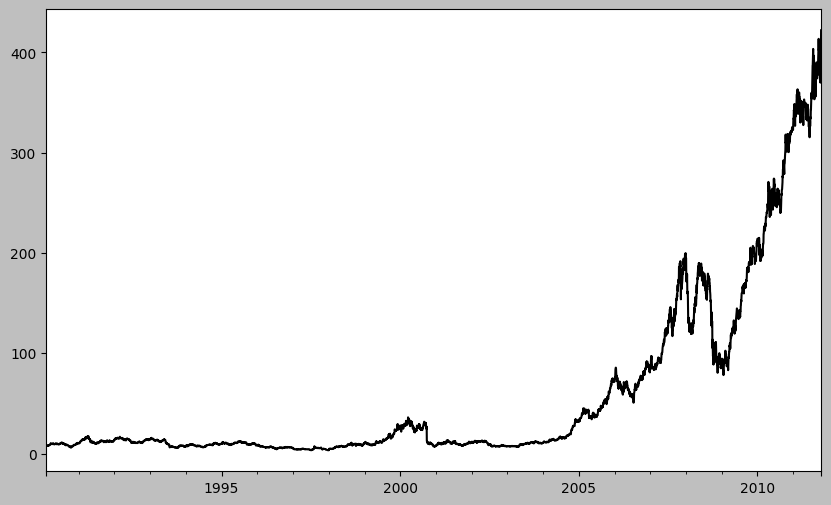

In [902]:
close_px["AAPL"].plot()

<Axes: >

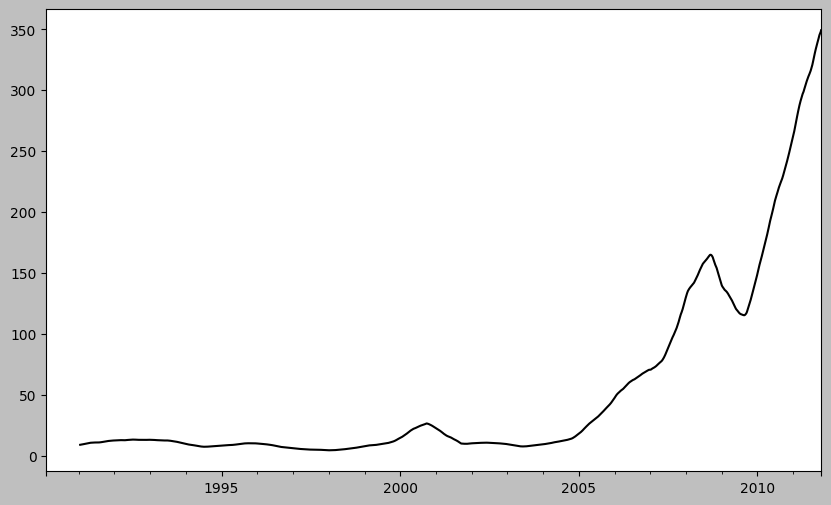

In [903]:
#! figure,id=apple_daily_ma250,title="Apple price with 250-day moving average"
close_px["AAPL"].rolling(250).mean().plot()

<Axes: >

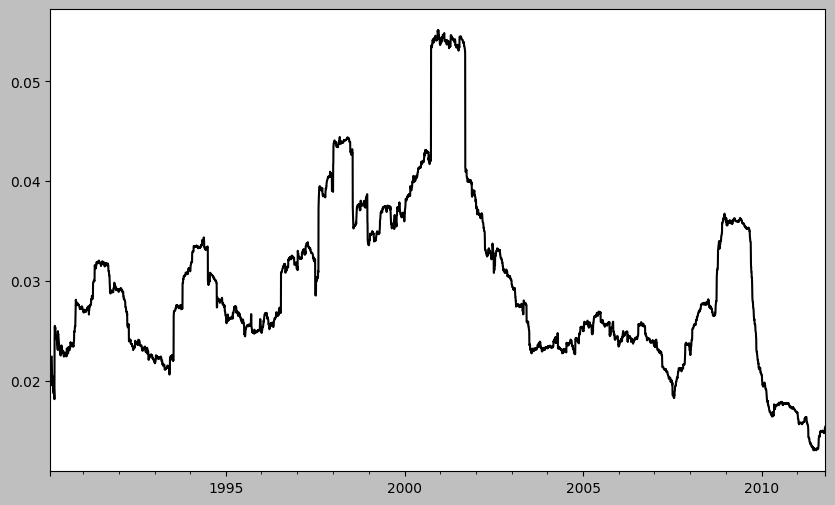

In [904]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
#! figure,id=apple_daily_std250,title="Apple 250-day daily return standard deviation"
std250.plot()

In [905]:
expanding_mean = std250.expanding().mean()

<Axes: >

<Figure size 1000x600 with 0 Axes>

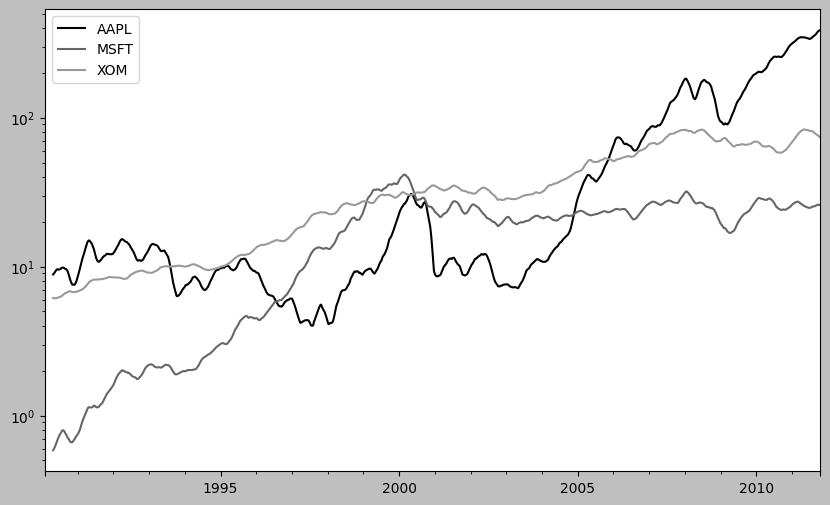

In [906]:
plt.figure()
plt.style.use('grayscale')
#! figure,id=stocks_daily_ma60,title="Stock prices 60-day moving average (log y-axis)"
close_px.rolling(60).mean().plot(logy=True)

In [907]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-05,8.013333,0.510000,6.203333
1990-02-06,8.040000,0.510000,6.210000
1990-02-07,7.986000,0.510000,6.234000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 지수 가중치 함수

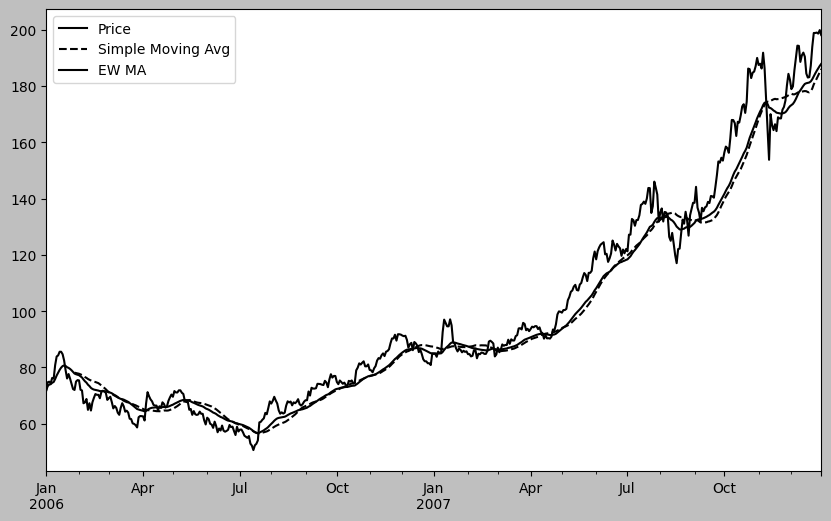

In [908]:
plt.figure()

aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
#! figure,id=timeseries_ewma,title="Simple moving average versus exponentially weighted"
plt.legend()

### 이진 이동 윈도우 함수

<Axes: >

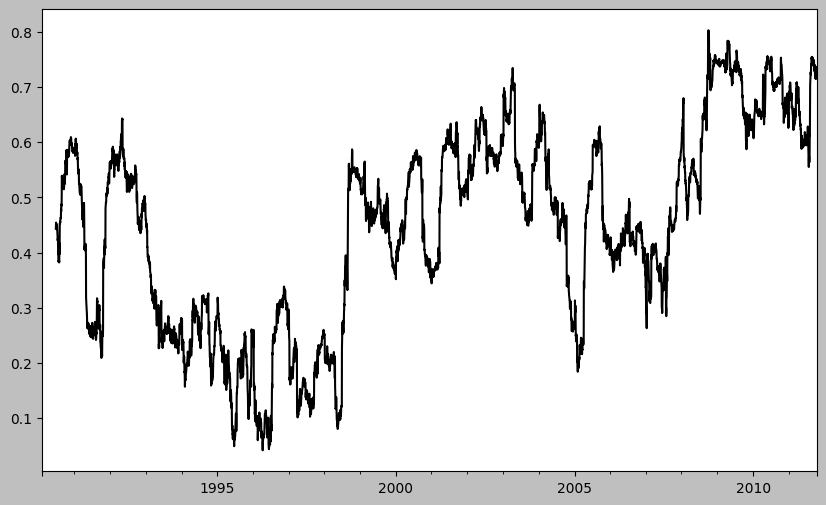

In [909]:
plt.figure()

spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
#! figure,id=roll_correl_aapl,title="Six-month AAPL return correlation to S&P 500"
corr.plot()

<Axes: >

<Figure size 1000x600 with 0 Axes>

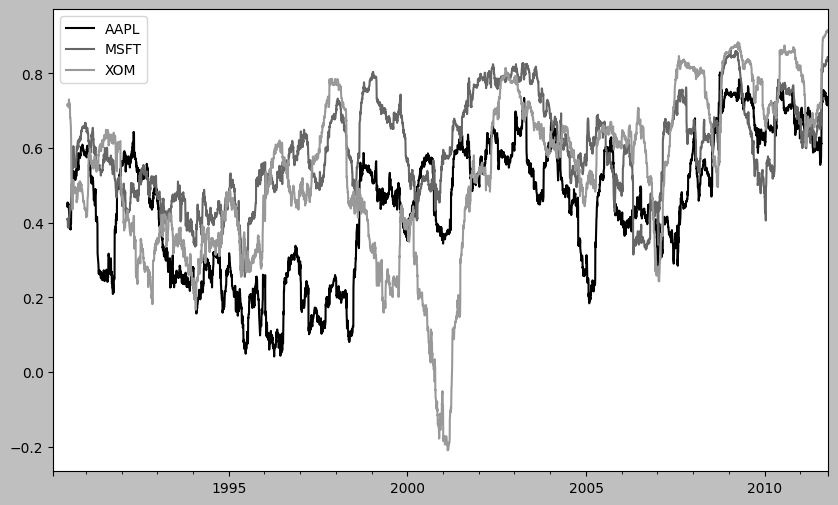

In [910]:
plt.figure()

corr = returns.rolling(125, min_periods=100).corr(spx_rets)
#! figure,id=roll_correl_all,title="Six-month return correlations to S&P 500"
corr.plot()

### 사용자 정의 윈도우 함수

<Axes: >

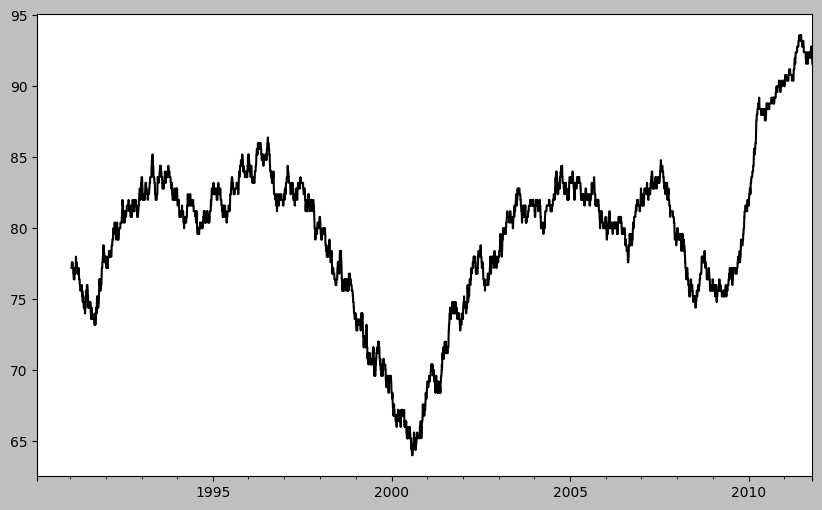

In [911]:
plt.figure()

from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
#! figure,id=roll_apply_ex,title="Percentile rank of 2% AAPL return over one-year window"
result.plot()